In [ ]:
df4[df4.total_sqft/df4.bhk<300].head()

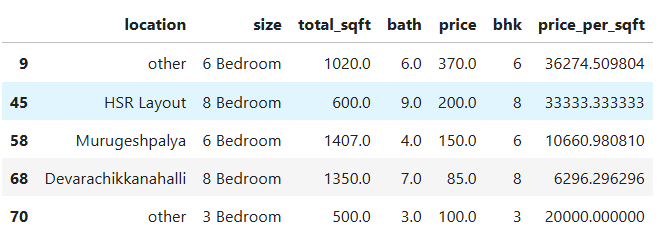

In [ ]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

df5.price_per_sqft.describe()

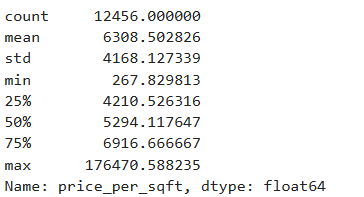

In [ ]:
def price_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft<= (m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df6 = price_outliers(df5)
df6.shape

(10241, 7)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]

    if bhk2.empty and bhk3.empty:
        print(f"No data for 2 BHK or 3 BHK in {location}")
        return

    matplotlib.rcParams['figure.figsize'] = (15, 10)
    if not bhk2.empty:
        plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
    if not bhk3.empty:
        plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='green', label='3 BHK', s=50)

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()


plot_scatter_chart(df6,"Rajaji Nagar")

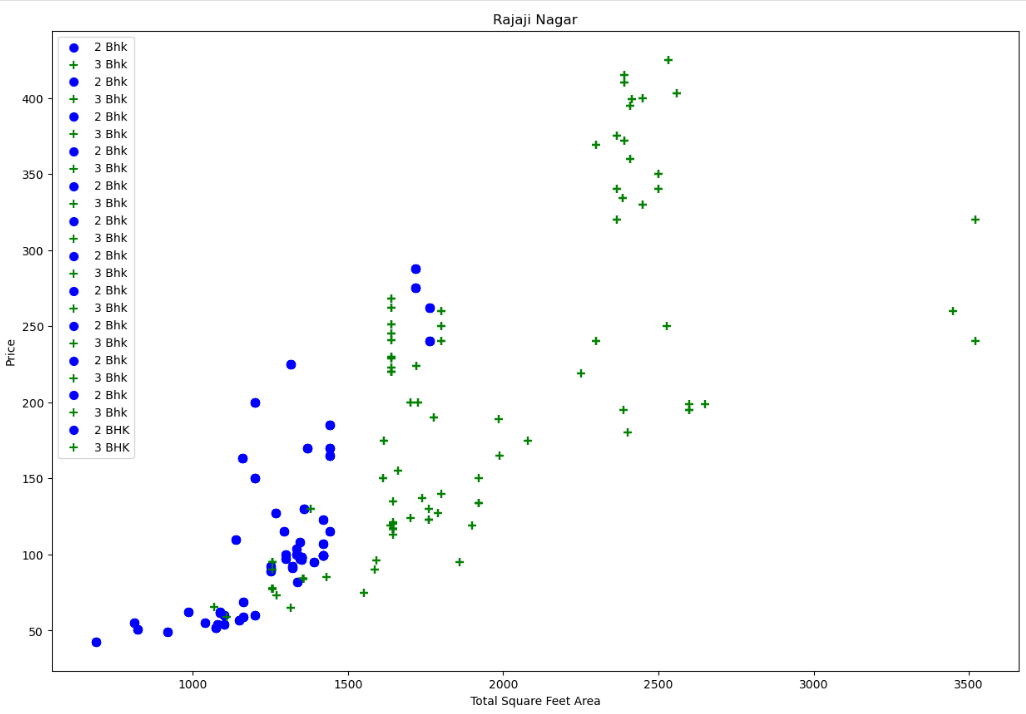

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

plot_scatter_chart(df7,"Rajaji Nagar")

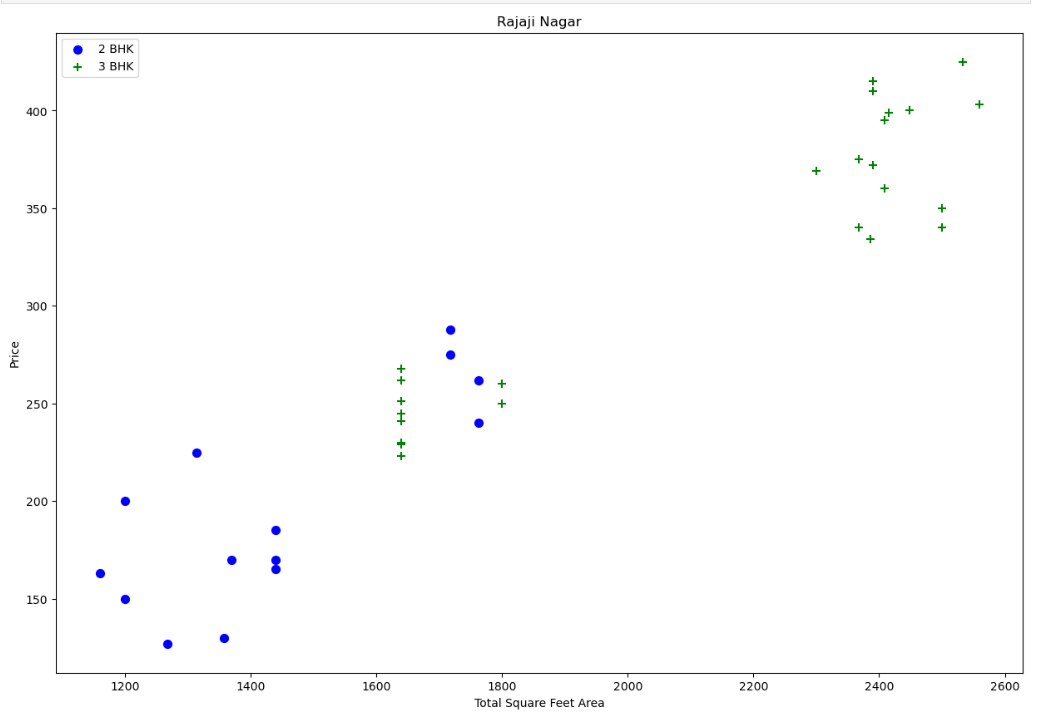

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20, 10)

if 'price_per_sqft' in df7.columns:
    clean_data = df7['price_per_sqft'].dropna()

    if not clean_data.empty:
        plt.hist(clean_data, rwidth=0.8)
        plt.xlabel("Price Per Square Feet")
        plt.ylabel("Count")
        plt.title("Distribution of Price Per Sqft")
        plt.show()
    else:
        print("No valid data to plot in 'price_per_sqft'")
else:
    print("Column 'price_per_sqft' not found in df7")

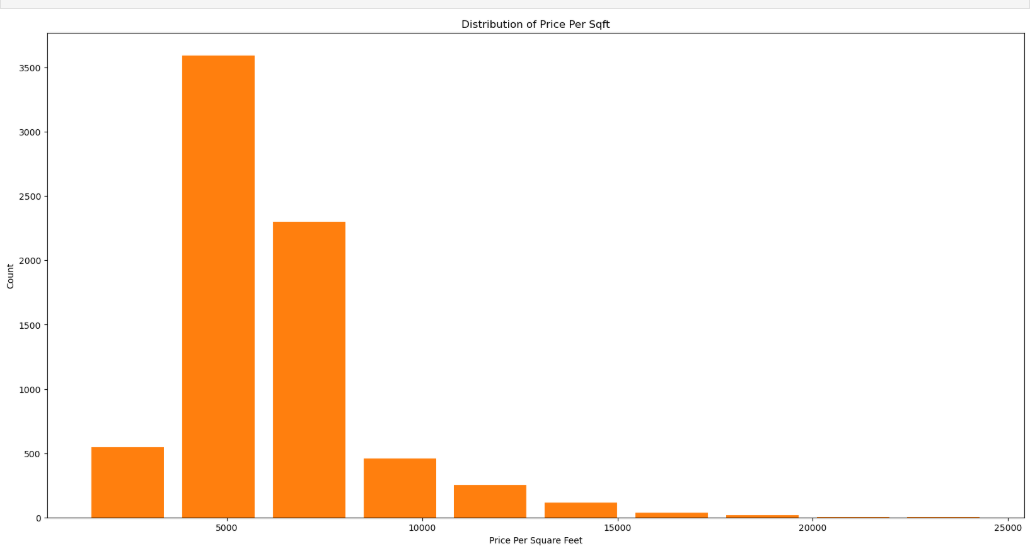

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

df20=df7['bath'].dropna()
plt.hist(df20,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

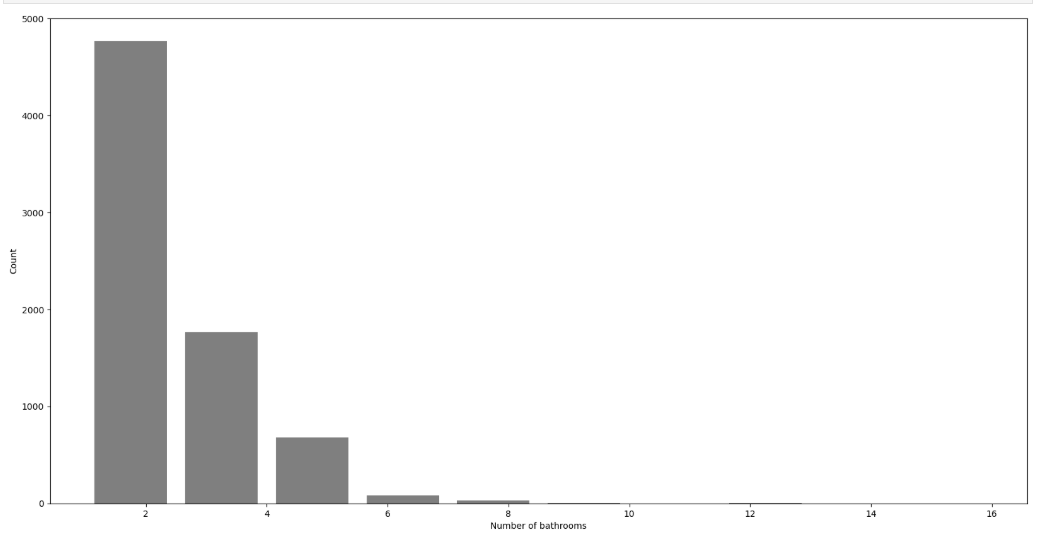

In [ ]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape
df8.head()

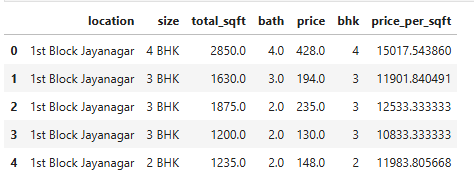